# Loan Prediction Analysis using classification Techniques

In [1]:
# Dream Finance house company deals in all home loans.They have 3 areas urban, semi urban and rural.
# Customer first apply for home loans.after that company check customer eligibility for loan.
# Company wants to automate the loan eligibility process based on customer details provided while filling online application form.
# These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.
# We have use supervised classification techniques

In [2]:
# Objective - A classification problem where we have to predict whether a loan would be approved or not.

# Import modules

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
os.chdir("C:\\Users\\HP\\Desktop\\Project")

In [5]:
dp = pd.read_csv("Loan Prediction Dataset.csv")

In [6]:
dp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
dp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Preprocessing the dataset

In [9]:
# find the null values
dp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# To check missing values

In [11]:
# fill the missing values for numerical terms - mean
dp['LoanAmount'] = dp['LoanAmount'].fillna(dp['LoanAmount'].mean())
dp['Loan_Amount_Term'] = dp['Loan_Amount_Term'].fillna(dp['Loan_Amount_Term'].mean())
dp['Credit_History'] = dp['Credit_History'].fillna(dp['Credit_History'].mean())

In [12]:
# fill the missing values for categorical terms - mode
dp['Gender'] = dp["Gender"].fillna(dp['Gender'].mode()[0])
dp['Married'] = dp["Married"].fillna(dp['Married'].mode()[0])
dp['Dependents'] = dp["Dependents"].fillna(dp['Dependents'].mode()[0])
dp['Self_Employed'] = dp["Self_Employed"].fillna(dp['Self_Employed'].mode()[0])

In [13]:
dp.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

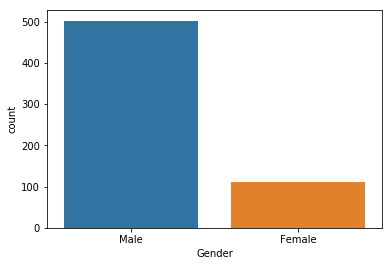

In [14]:
# categorical attributes visualization
sns.countplot(dp['Gender'])

In [15]:
# Here,Male applicants are more than female applicants.

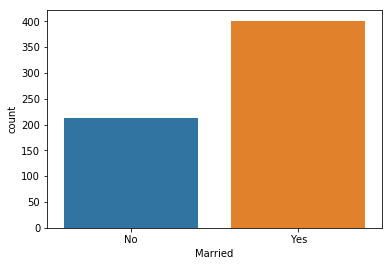

In [16]:
sns.countplot(dp['Married'])

In [17]:
# Here,No of applicants who are married are more than no of applicants who are not married.

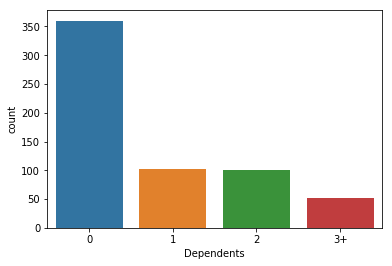

In [18]:
sns.countplot(dp['Dependents'])

In [19]:
# Applicants with no dependents are maximum.

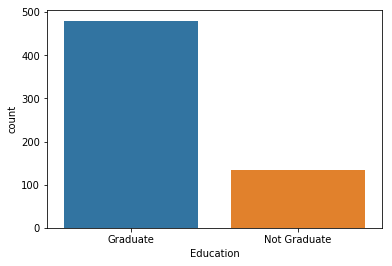

In [20]:
sns.countplot(dp['Education'])

In [21]:
#Here,Applicants with graduation are more than applicants whith no graduation.

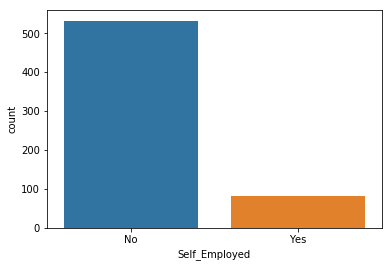

In [22]:
sns.countplot(dp['Self_Employed'])

In [23]:
# Here,self employed means buisness,few of people self employed .majority of people working

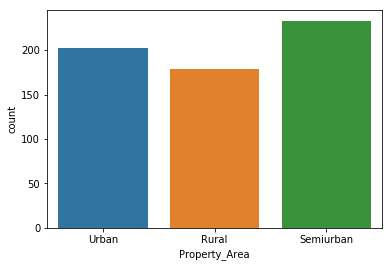

In [24]:
sns.countplot(dp['Property_Area'])

In [25]:
# Here,Applicants are equally distributed all areas Urban,Rural,Semi-urban. Urban areas has majority of applicants.
# not much variation as compare to Rural,semiurban

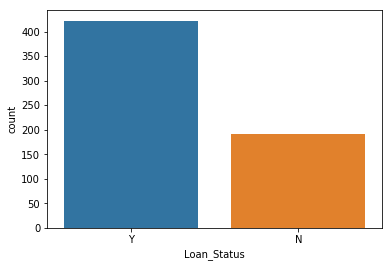

In [26]:
sns.countplot(dp['Loan_Status'])

In [27]:
# Majority of Loan approved around 400 and rejected applicants loan approved near to around 180

In [28]:
# Numerical attribute

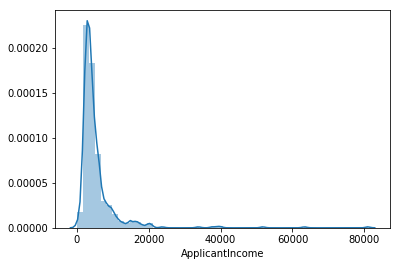

In [29]:
# numerical attributes visualization
sns.distplot(dp["ApplicantIncome"])

In [30]:
# The graph is left skewed .so we normal the data
# we use log normal transformation

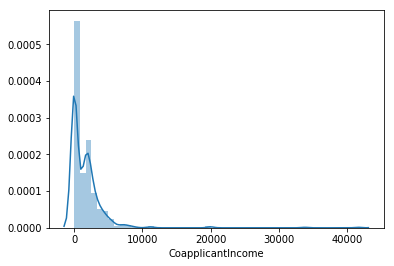

In [31]:
sns.distplot(dp["CoapplicantIncome"])

In [32]:
# The graph is left skewed .so we normal the data
# we use log normal transformation

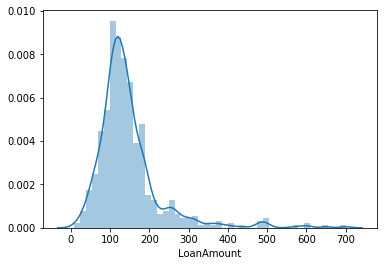

In [33]:
sns.distplot(dp["LoanAmount"])

In [34]:
# Here,Loan amount is bell shaped but left skewed 
# we use log normal transformation

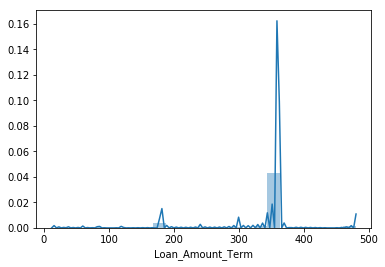

In [208]:
sns.distplot(dp['Loan_Amount_Term'])

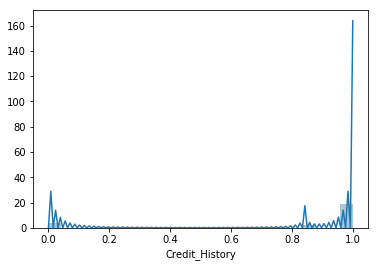

In [209]:
sns.distplot(dp['Credit_History'])

In [210]:
# we use log normal transformation on credit_history,Loan amount term

# Create New Attribute

In [211]:
# total income
dp['Total_Income'] = dp['ApplicantIncome'] + dp['CoapplicantIncome']
dp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Log Transformation

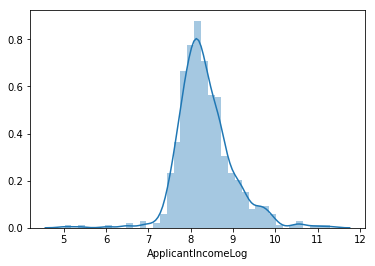

In [212]:
# apply log transformation to the attribute
dp['ApplicantIncomeLog'] = np.log(dp['ApplicantIncome']+1)
sns.distplot(dp["ApplicantIncomeLog"])

In [213]:
# ApplicantIncome use log transformation.so ApplicantIncome are now normally distributed

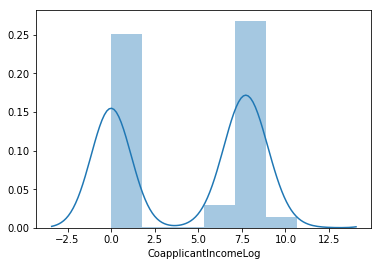

In [214]:
dp['CoapplicantIncomeLog'] = np.log(dp['CoapplicantIncome']+1)
sns.distplot(dp["CoapplicantIncomeLog"])

In [215]:
#CoApplicantIncome use log transformation.so CoApplicantIncome are now normally distributed

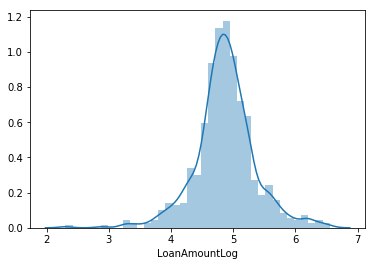

In [216]:
dp['LoanAmountLog'] = np.log(dp['LoanAmount']+1)
sns.distplot(dp["LoanAmountLog"])

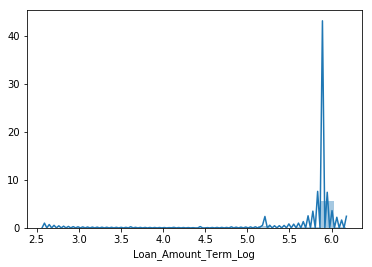

In [217]:
dp['Loan_Amount_Term_Log'] = np.log(dp['Loan_Amount_Term']+1)
sns.distplot(dp["Loan_Amount_Term_Log"])

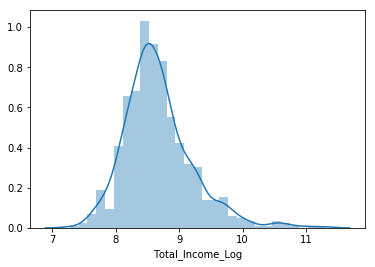

In [218]:
dp['Total_Income_Log'] = np.log(dp['Total_Income']+1)
sns.distplot(dp["Total_Income_Log"])

In [219]:
# LoanAmountLog ,Loan_Amount_Term_Log, Total_Income_Log use log transformation.
# so LoanAmountLog ,Loan_Amount_Term_Log, Total_Income_Log are now normally distributed

In [220]:
 # To check correlation

# Correlation Matrix

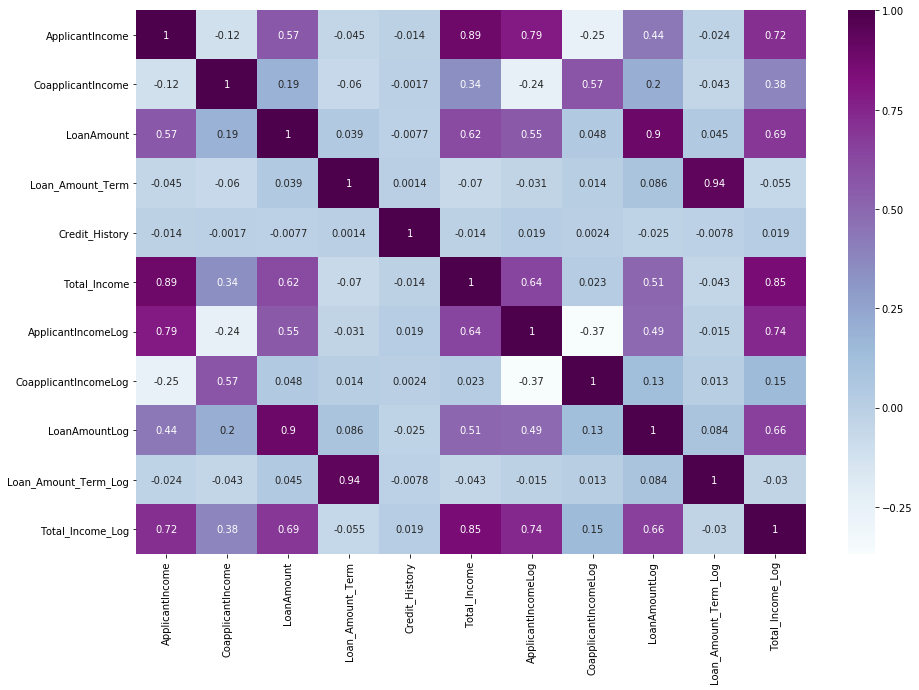

In [221]:
corr = dp.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [222]:
# so influential unnecessary column we deleted
# ApplicantIncome ,CoapplicantIncome are negative correlation 
# applicant income and loan amount are highly positively correlated
# Loan_id is not necessary attribute so we deleted
# In the analysis unnecessary attribute we deleted such as ApplicantIncome,CoapplicantIncome,LoanAmount,
# Loan_Amount_Term,Total_Income,Loan_ID,CoapplicantIncomeLog


In [223]:
dp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [224]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
dp = dp.drop(columns=cols, axis=1)
dp.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


# Label Encoding

In [225]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    dp[col] = le.fit_transform(dp[col])

In [226]:
dp.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


# Train -Test Split

In [227]:
# specify input and output attributes
X = dp.drop(columns=['Loan_Status'], axis=1)
y = dp['Loan_Status']

In [228]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training

In [229]:
# We use cross validation
# cross validation - it is used for better validation of model

In [230]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [231]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [232]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
Cross validation is 68.56990537118486


In [233]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 77.53032120485139


In [234]:
#  we use hyperparameter tuning on Random forest

In [235]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 75.97402597402598
Cross validation is 80.12928162068506


In [236]:
#  we check the accuracy  using model Random forest

In [237]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [238]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[23, 31],
       [ 5, 95]], dtype=int64)

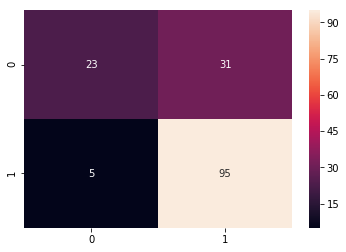

In [239]:
sns.heatmap(cm, annot=True)